In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from datetime import datetime

In [2]:
jan_feb_responses = pd.read_csv("data/Responses/responsesP1(Jan-Feb).csv")
mar_apr_responses = pd.read_csv("data/Responses/responsesP2(Mar-Apr).csv")
may_jun_responses = pd.read_csv("data/Responses/responsesP3(May-Jun).csv")
jul_aug_responses = pd.read_csv("data/Responses/responsesP4(Jul-Aug).csv")
sep_oct_responses = pd.read_csv("data/Responses/responsesP5(Sep-Oct).csv")
nov_dec_responses = pd.read_csv("data/Responses/responsesP6(Nov-Dec).csv")

Split responses into 111 calls vs non all other calls

In [3]:
jan_feb_responses_111 = jan_feb_responses[jan_feb_responses['chiefcomplaintcode'] == 111]
mar_apr_responses_111 = mar_apr_responses[mar_apr_responses['chiefcomplaintcode'] == 111]
may_jun_responses_111 = may_jun_responses[may_jun_responses['chiefcomplaintcode'] == 111]
jul_aug_responses_111 = jul_aug_responses[jul_aug_responses['chiefcomplaintcode'] == 111]
sep_oct_responses_111 = sep_oct_responses[sep_oct_responses['chiefcomplaintcode'] == 111]
nov_dec_responses_111 = nov_dec_responses[nov_dec_responses['chiefcomplaintcode'] == 111]

jan_feb_responses_not_111 = jan_feb_responses[jan_feb_responses['chiefcomplaintcode'] != 111]
mar_apr_responses_not_111 = mar_apr_responses[mar_apr_responses['chiefcomplaintcode'] != 111]
may_jun_responses_not_111 = may_jun_responses[may_jun_responses['chiefcomplaintcode'] != 111]
jul_aug_responses_not_111 = jul_aug_responses[jul_aug_responses['chiefcomplaintcode'] != 111]
sep_oct_responses_not_111 = sep_oct_responses[sep_oct_responses['chiefcomplaintcode'] != 111]
nov_dec_responses_not_111 = nov_dec_responses[nov_dec_responses['chiefcomplaintcode'] != 111]

Put all responses for the year into one dataframe

In [4]:
all_responses_111 = jan_feb_responses_111.append([mar_apr_responses_111,may_jun_responses_111,jul_aug_responses_111,sep_oct_responses_111,nov_dec_responses_111])
all_responses_not_111 = jan_feb_responses_not_111.append([mar_apr_responses_not_111,may_jun_responses_not_111,jul_aug_responses_not_111,sep_oct_responses_not_111,nov_dec_responses_not_111])

In [5]:
all_responses_111.shape

(262782, 43)

In [6]:
# clean repeated dates by restricting the dates
all_responses_111 = all_responses_111[(all_responses_111['callstart'] > '2017-12-31') & (all_responses_111['callstart'] < '2019-01-01')]
all_responses_not_111 = all_responses_not_111[(all_responses_not_111['callstart'] > '2017-12-31') & (all_responses_not_111['callstart'] < '2019-01-01')]

In [7]:
all_responses_111.shape

(260732, 43)

------

## Group 111 calls by LSOA and time of day during working days
Outputs one file per hour of the day with the count of 111 calls in each LSOA

In [8]:
all_responses_111['callstart'] = pd.to_datetime(all_responses_111['callstart'])
all_responses_111['day_of_week'] = all_responses_111['callstart'].dt.day_name()

In [9]:
# keep responses that happened on week days
all_responses_111_weekdays = all_responses_111[(all_responses_111['day_of_week'] != 'Sunday') & (all_responses_111['day_of_week'] != 'Saturday')]

In [10]:
all_responses_111_weekdays.shape

(174496, 44)

In [11]:
all_responses_111_weekdays['time_of_day'] = all_responses_111_weekdays['callstart'].dt.hour

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
for i in range(0, 24):
    file_name = "outputs/num_responses_111_per_lsoa_time_" + str(i) + ".csv"
    num_responses_111_per_lsoa_time_i = all_responses_111_weekdays[all_responses_111_weekdays['time_of_day'] == i].groupby('lsoa').count()[['incidentid']].reset_index()
    num_responses_111_per_lsoa_time_i.to_csv(file_name)

-----------

## Compare 111 calls to non-111 calls
Are there any noticeable patterns? Could we say that 111 calls are used more by locals? Is there a difference in 111 usage between females/males and different age groups?

In [14]:
all_responses_111.shape

(260732, 44)

In [15]:
all_responses_not_111.shape

(1686138, 43)

### Borough

In [16]:
num_responses_111_per_borough = all_responses_111.groupby('borough').count()[['incidentid']].rename(columns={'incidentid':'num_111_responses'})
num_responses_not_111_per_borough = all_responses_not_111.groupby('borough').count()[['incidentid']].rename(columns={'incidentid':'num_not_111_responses'})

In [17]:
borough_111_vs_not_111 = pd.concat([num_responses_111_per_borough,num_responses_not_111_per_borough], axis=1)

In [18]:
borough_111_vs_not_111['per_111_responses'] = borough_111_vs_not_111['num_111_responses'] / borough_111_vs_not_111['num_111_responses'].sum() * 100
borough_111_vs_not_111['per_not_111_responses'] = borough_111_vs_not_111['num_not_111_responses'] / borough_111_vs_not_111['num_not_111_responses'].sum() * 100

borough_111_vs_not_111['per_abs_difference'] = (borough_111_vs_not_111['per_111_responses'] - borough_111_vs_not_111['per_not_111_responses']).abs()

In [19]:
borough_111_vs_not_111.to_csv("outputs/percentage_diff_111_vs_not_111_by_borough.csv")

In [20]:
borough_111_vs_not_111

,num_111_responses,num_not_111_responses,per_111_responses,per_not_111_responses,per_abs_difference
borough,,,,,
Barking and Dagenham,7777,41949,2.983546,2.489118,0.494428
Barnet,10380,61591,3.982153,3.654610,0.327543
Bexley,7792,41476,2.989300,2.461051,0.528249
Brent,10000,64743,3.836371,3.841640,0.005269
Bromley,9823,53602,3.768467,3.180569,0.587898
Camden,6836,56630,2.622543,3.360241,0.737697
City of London,807,12618,0.309595,0.748711,0.439116
Croydon,15324,73363,5.878855,4.353123,1.525733
Ealing,10617,65903,4.073075,3.910470,0.162605


### Gender

In [21]:
num_responses_111_per_gender = all_responses_111.groupby('sex').count()[['incidentid']].rename(columns={'incidentid':'num_111_responses'})
num_responses_not_111_per_gender = all_responses_not_111.groupby('sex').count()[['incidentid']].rename(columns={'incidentid':'num_not_111_responses'})

In [22]:
gender_111_vs_not_111 = pd.concat([num_responses_111_per_gender,num_responses_not_111_per_gender], axis=1)

In [23]:
gender_111_vs_not_111

,num_111_responses,num_not_111_responses
sex,,
F,156060,795888
M,101976,831668
U,149,33318


Chi-squared test

In [24]:
chi2, p, dof, ex = chi2_contingency(gender_111_vs_not_111)

In [25]:
expected_df = pd.DataFrame(ex)
gender_expected_data = {'num_111_responses': expected_df.iloc[:,0], 'num_not_111_responses': expected_df.iloc[:,1]}
gender_111_vs_not_111_expected = pd.DataFrame(data = gender_expected_data)
gender_111_vs_not_111_expected.index = gender_111_vs_not_111.index

In [26]:
gender_111_vs_not_111_expected = gender_111_vs_not_111_expected.astype(int)

In [27]:
gender_111_vs_not_111_expected

,num_111_responses,num_not_111_responses
sex,,
F,128072,823875
M,125609,808034
U,4502,28964


### Age

In [28]:
# no NAs can be passed to this function -- TODO: check age is a valid number
def calculate_age_range(age):
    if (age <= 15):
        return '0-15'
    elif (age > 15 and age <= 29):
        return '16-29'
    elif (age > 29 and age <= 44):
        return '30-44'
    elif (age > 44 and age <= 64):
        return '45-64'
    elif (age > 64 and age <= 84):
        return '65-84'
    else:
        return '85+'

In [29]:
# remove all null ages
all_responses_111_age = all_responses_111.dropna(subset=['age'])
all_responses_not_111_age = all_responses_not_111.dropna(subset=['age'])

In [30]:
all_responses_111_age.shape

(259469, 44)

In [31]:
all_responses_not_111_age.shape

(1593526, 43)

In [32]:
all_responses_111_age['age_range'] = all_responses_111_age['age'].apply(lambda x: calculate_age_range(x))
all_responses_not_111_age['age_range'] = all_responses_not_111_age['age'].apply(lambda x: calculate_age_range(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
num_responses_111_per_age_range = all_responses_111_age.groupby('age_range').count()[['incidentid']].rename(columns={'incidentid':'num_111_responses'})
num_responses_not_111_per_age_range = all_responses_not_111_age.groupby('age_range').count()[['incidentid']].rename(columns={'incidentid':'num_not_111_responses'})

In [34]:
age_111_vs_not_111 = pd.concat([num_responses_111_per_age_range,num_responses_not_111_per_age_range], axis=1)

In [35]:
age_111_vs_not_111

,num_111_responses,num_not_111_responses
age_range,,
0-15,30626,116997
16-29,28434,155169
30-44,54967,322345
45-64,55749,354255
65-84,49979,332114
85+,39714,312646


Chi-squared test

In [36]:
chi2, p, dof, ex = chi2_contingency(age_111_vs_not_111)

In [37]:
expected_df = pd.DataFrame(ex)
age_expected_data = {'num_111_responses': expected_df.iloc[:,0], 'num_not_111_responses': expected_df.iloc[:,1]}
age_111_vs_not_111_expected = pd.DataFrame(data = age_expected_data)
age_111_vs_not_111_expected.index = age_111_vs_not_111.index
age_111_vs_not_111_expected = age_111_vs_not_111_expected.astype(int)

In [38]:
age_111_vs_not_111_expected

,num_111_responses,num_not_111_responses
age_range,,
0-15,20671,126951
16-29,25709,157893
30-44,52833,324478
45-64,57411,352592
65-84,53503,328589
85+,49339,303020


-----

## Ward Outliers per Day
Were there any wards that had outstanding incidents on a particular day?

In [40]:
all_responses = jan_feb_responses.append([mar_apr_responses, may_jun_responses, jul_aug_responses, sep_oct_responses, nov_dec_responses])

In [41]:
all_responses.shape

(1959727, 43)

In [42]:
# get only 2018 data
all_responses = all_responses[(all_responses['callstart'] > '2017-12-31') & (all_responses['callstart'] < '2019-01-01')]

In [43]:
all_responses.shape

(1946870, 43)

In [44]:
all_responses['day_of_year'] = pd.to_datetime(all_responses['callstart']).dt.dayofyear

In [45]:
responses_by_ward_and_day = all_responses.groupby(['wardID','day_of_year']).count()[['incidentid']].reset_index().rename(columns={'incidentid':'num_incidents'})

In [46]:
subset_days = responses_by_ward_and_day[responses_by_ward_and_day['day_of_year'] == 26]

Text(0.5,1,'Distribution of incidents in wards on January 26')

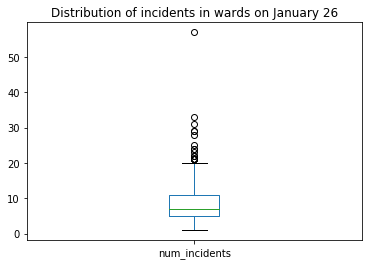

In [47]:
subset_days.boxplot(column='num_incidents', grid=False)
plt.title("Distribution of incidents in wards on January 26")

In [48]:
group_by_day_of_year = responses_by_ward_and_day.groupby('day_of_year')

In [51]:
stats_incidents_per_day_all_wards = group_by_day_of_year['num_incidents'].describe().reset_index()

In [52]:
stats_incidents_per_day_all_wards['IQR'] = stats_incidents_per_day_all_wards['75%'] - stats_incidents_per_day_all_wards['25%']
# apply Tukey fences
stats_incidents_per_day_all_wards['outlier_upper_limit'] = stats_incidents_per_day_all_wards['75%'] + 1.5 * stats_incidents_per_day_all_wards['IQR']

In [54]:
outliers_per_ward = {}
data_outliers_per_day = []

for day in range(1,366):
    outlier_upper_limit = stats_incidents_per_day_all_wards[stats_incidents_per_day_all_wards['day_of_year'] == day].iloc[0]['outlier_upper_limit']
    outlier_wards = responses_by_ward_and_day[(responses_by_ward_and_day['day_of_year'] == day) & (responses_by_ward_and_day['num_incidents'] > outlier_upper_limit)]['wardID']
    
    for outlier_ward in outlier_wards:
        if outlier_ward in outliers_per_ward:
            outliers_per_ward[outlier_ward] += 1 
        else:
            outliers_per_ward[outlier_ward] = 1
        
        data_outliers_per_day.append([day,outlier_ward,True])

data_outliers_per_ward = []
for ward in outliers_per_ward:
    num_outliers = outliers_per_ward[ward]
    
    data_outliers_per_ward.append([ward,num_outliers])

In [55]:
outliers_per_ward = pd.DataFrame(data=data_outliers_per_ward, columns=['wardID','num_days_as_outlier'])
outliers_per_ward.head()

,wardID,num_days_as_outlier
0,00AEGK,5
1,00AGGU,157
2,00AMGK,6
3,00ASGP,362
4,00AYFZ,184


In [56]:
outliers_per_day = pd.DataFrame(data=data_outliers_per_day, columns=['day_of_year','wardID','is_outlier'])
outliers_per_day.shape

(6455, 3)

In [57]:
outliers_per_day.head()

,day_of_year,wardID,is_outlier
0,1,00AEGK,True
1,1,00AGGU,True
2,1,00AMGK,True
3,1,00ASGP,True
4,1,00AYFZ,True


In [58]:
outliers_per_ward.sort_values(by=['num_days_as_outlier'], ascending=False).head()

,wardID,num_days_as_outlier
9,00BKGQ,364
3,00ASGP,362
10,00BKGW,335
7,00BBGU,292
37,00AHGM,251


### Create daily london plots showing the day's outlier wards

In [59]:
london_wards = gpd.read_file("data/statistical-gis-boundaries-london-2011/ESRI/London_Ward_CityMerged.shp")

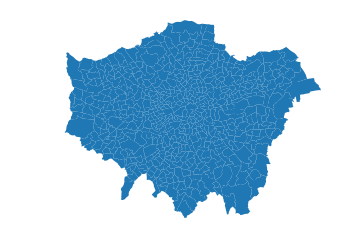

In [60]:
%matplotlib inline
london_wards_plot = london_wards.plot()
london_wards_plot.set_axis_off()

In [61]:
london_wards_profiles = pd.read_csv("data/ward-profiles-excel-version.csv", header=None)

In [62]:
london_wards_profiles.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,City of London,00AA,E09000001,8100.0,650.0,6250.0,1250.0,8.0,76.9,15.2,...,662.9,210.5,656.4,85.3,0.4,18.6,0.4,7.9,5.3,48.5
1,Barking and Dagenham - Abbey,00ABFX,E05000026,14750.0,3850.0,10150.0,750.0,26.0,69.0,5.0,...,682.6,208.9,138.1,42.2,1.4,21.9,0.5,6.0,0.8,25.7
2,Barking and Dagenham - Alibon,00ABFY,E05000027,10600.0,2700.0,6800.0,1050.0,25.7,64.3,10.0,...,627.9,201.6,73.6,27.3,0.7,20.6,0.8,3.1,1.0,20.3
3,Barking and Dagenham - Becontree,00ABFZ,E05000028,12700.0,3200.0,8350.0,1100.0,25.4,65.9,8.7,...,632.0,207.9,79.9,27.6,1.2,1.9,0.9,2.9,1.6,22.5
4,Barking and Dagenham - Chadwell Heath,00ABGA,E05000029,10400.0,2550.0,6400.0,1450.0,24.3,61.5,14.2,...,613.9,210.5,76.1,24.6,1.3,56.0,0.9,2.3,1.2,25.3


In [63]:
london_wards_profiles = london_wards_profiles.iloc[:,[0,1,2]]

In [65]:
london_wards_profiles.columns = ['ward_name','wardID','GSS_CODE']

In [66]:
london_wards_profiles.head()

,ward_name,wardID,GSS_CODE
0,City of London,00AA,E09000001
1,Barking and Dagenham - Abbey,00ABFX,E05000026
2,Barking and Dagenham - Alibon,00ABFY,E05000027
3,Barking and Dagenham - Becontree,00ABFZ,E05000028
4,Barking and Dagenham - Chadwell Heath,00ABGA,E05000029


In [67]:
london_wards_with_old_code = pd.merge(london_wards, london_wards_profiles[['wardID','GSS_CODE']], on=['GSS_CODE'], how='left')

In [68]:
london_wards_with_incident_outliers = pd.merge(london_wards_with_old_code, outliers_per_ward, on=['wardID'], how='left')

In [69]:
london_wards_with_incident_outliers = london_wards_with_incident_outliers.fillna(0)

In [70]:
london_wards_with_incident_outliers.to_file("outputs/london_wards_with_incident_outliers.shp")

In [71]:
london_wards_with_old_code.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,wardID
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",00AXGC
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",00AXGM
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",00AXFY
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",00AXFX
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071 168144.9, 522063.9 168144, 52...",00AXFZ


In [73]:
london_wards_with_old_code[['geometry','wardID']].head()

,geometry,wardID
0,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",00AXGC
1,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",00AXGM
2,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",00AXFY
3,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",00AXFX
4,"POLYGON ((522071 168144.9, 522063.9 168144, 52...",00AXFZ


In [74]:
data_days_wards = []
for day in range(1,366):
    for ward in london_wards_with_old_code['wardID']:
        data_days_wards.append([day,ward])
        
days_vs_wards = pd.DataFrame(data=data_days_wards, columns=['day_of_year','wardID'])


In [75]:
days_vs_wards.head()

,day_of_year,wardID
0,1,00AXGC
1,1,00AXGM
2,1,00AXFY
3,1,00AXFX
4,1,00AXFZ


In [76]:
merge_days_vs_wards_outliers = pd.merge(days_vs_wards, outliers_per_day, on=['day_of_year','wardID'],how='left')

In [77]:
merge_days_vs_wards_outliers = merge_days_vs_wards_outliers.fillna(False)
merge_days_vs_wards_outliers.head()

,day_of_year,wardID,is_outlier
0,1,00AXGC,False
1,1,00AXGM,False
2,1,00AXFY,False
3,1,00AXFX,False
4,1,00AXFZ,False


In [78]:
merge_days_vs_wards_outliers.head()['date'] = pd.to_datetime(2018 * 1000 + merge_days_vs_wards_outliers['day_of_year'], format='%Y%j').dt.date
merge_days_vs_wards_outliers.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,day_of_year,wardID,is_outlier
0,1,00AXGC,False
1,1,00AXGM,False
2,1,00AXFY,False
3,1,00AXFX,False
4,1,00AXFZ,False


In [ ]:
# Create a plot for each day of the year showing the outliers for that day
for day in range(1,366) :
    day_pattern = merge_days_vs_wards_outliers[merge_days_vs_wards_outliers['day_of_year'] == day]
    merge_day_pattern_and_geometry = pd.merge(day_pattern,london_wards_with_old_code[['geometry','wardID']], on='wardID',how='left')
    merge_day_pattern_and_geometry = gpd.GeoDataFrame(merge_day_pattern_and_geometry)

    image_title = datetime.strftime(datetime.strptime(str(merge_day_pattern_and_geometry['date'].iloc[0]), "%Y-%m-%d"),"%d %B %Y")
    image_file_path = "outputs/outliers_per_day/day_" + str(day) + ".png"
    
    fig, ax = plt.subplots(1)
    merge_day_pattern_and_geometry.plot(column='is_outlier', ax=ax)
    ax.axis('off')
    fig.suptitle(image_title)
    plt.savefig(image_file_path)
    plt.close(fig)
    